# PREDICTION DU TAUX DE CONVERSION SUR UN SITE INTERNET 

###  Objectifs :
- IL S'AGIT ICI DE PREDIRE SI UN CLIENT VA CONVERTIR OU NON avec 95% DE PRECISION
        - Nous utiliserons les matrices de confusion le Gridsearch etla crossvalidation pour peformer le modèle
        - Nous ferons ceciàl'aide d'un Pipeline = (transforùers + estimateurs de classification)

# Importer les librairies 

In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

# Le Dataset

In [4]:
data=pd.read_csv("D:\FRANCE 20 MAI 2018\DATA SCIENCES\DATABASE UPLOADED\MES EXPORTS_PERSO\conversion_data.csv")  
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
dataset = data.copy()

# EDA : Exploration Data Analysis

### Analyse de la forme 

In [6]:
# Nombre de lignes et de colonnes
print("Nbre lignes et de colonnes", dataset.shape)

Nbre lignes et de colonnes (316200, 6)


In [12]:
# type de variables
A = pd.DataFrame(dataset.dtypes, columns = ["Type"])

print("Nombre de types de variables : ", len(A.groupby(["Type"]).count()))
A.groupby(["Type"]).size()

Nombre de types de variables :  2


Type
int64     4
object    2
dtype: int64

In [14]:
dataset.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [15]:
# Valeurs manquantes ?
print("Pourcentage valeurs manquante")
dataset.isna().sum() / dataset.shape[0]

Pourcentage valeurs manquante


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

## Conclusion_1

### Analyse du fond 

In [16]:
print(dataset.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [8]:
#Nombre de connexions par pays 
User_country = dataset.groupby(["country"])[["new_user"]].count()
User_country.sort_values(by = "new_user", ascending = False)

,new_user
country,
US,178092
China,76602
UK,48450
Germany,13056


## Conclusion_2

In [19]:
print(""" Un plus grand nombre  de users 87279 aux USA optimisenet les moteurs de recherche 
du site ==> ceci renforce l'idée que c'est un site  américain  """)

(dataset.groupby(["country", "source"])[["new_user"]].count().sort_values(by = "new_user", ascending = False))

 Un plus grand nombre  de users 87279 aux USA optimisenet les moteurs de recherche 
du site ==> ceci renforce l'idée que c'est un site  américain  


new_user
country source          
US      Seo        87229
        Ads        49901
        Direct     40962
China   Seo        37578
UK      Seo        23801
China   Ads        21561
        Direct     17463
UK      Ads        13518
        Direct     11131
Germany Seo         6432
        Ads         3760
        Direct      2864

In [20]:
# Déterminer les features et la Target
y = dataset.loc[:, ["converted"]]
X = dataset.loc[:, dataset.columns != "converted"] 

### Les variables catégorielles 

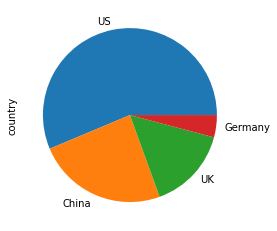

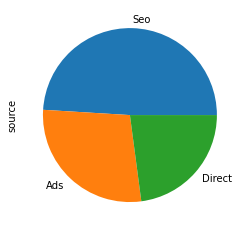

In [22]:
for col in X.select_dtypes('object'):
    plt.figure()
    X[col].value_counts().plot.pie()

### Les variables quantitatives 

 Nous avons des outliers au niveaud e l'age 
Nous remarquons aussi que la dataset est déséquilibrée trop de conversions par rapport au non conversion



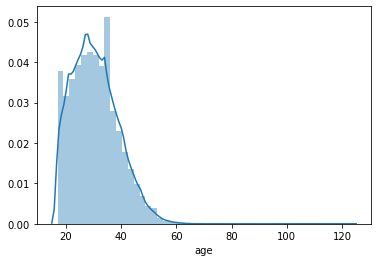

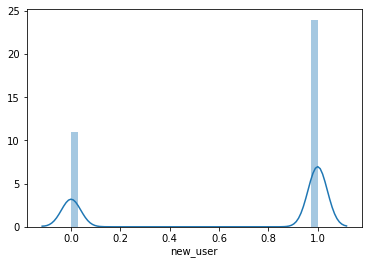

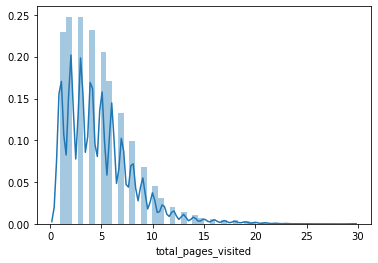

In [13]:
print(""" Nous avons des outliers au niveaud e l'age 
Nous remarquons aussi que la dataset est déséquilibrée trop de conversions par rapport au non conversion
""")

for col in X.select_dtypes('int64'):
    plt.figure()
    sns.distplot(X[col])

## Gestions des outliers

In [14]:
print(""" Nous avons uniquement 2 personne âgées de plus de 100 ans, nous pouvons  
      les supprimers sans soucis de modification significative du dataset """)
dataset[dataset['age']>100]

 Nous avons uniquement 2 personne âgées de plus de 100 ans, nous pouvons  
      les supprimers sans soucis de modification significative du dataset 


,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [23]:
dataset = dataset[dataset['age']<=100]

## Visualisation des paramètres en fonction de la conversion 

### Relation entre les paramètres et la conversion  

 Les chinois convertissent moins que les autres pays, les premiers à convertir ont les allemands
          puis les anglais et les américains
          pourtant tout porte à que c'est  un site américain puisqu'ils sont plus nombreux 
          il faudrait donc augmenter leur possibilité de conversion. L'âge est il correler avec la conversion ?



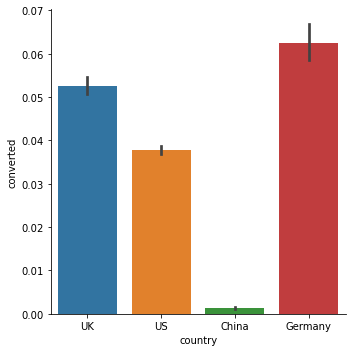

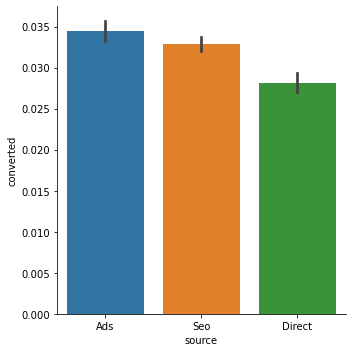

In [33]:
print(""" Les chinois convertissent moins que les autres pays, les premiers à convertir ont les allemands
          puis les anglais et les américains
          pourtant tout porte à que c'est  un site américain puisqu'ils sont plus nombreux 
          il faudrait donc augmenter leur possibilité de conversion. L'âge est il correler avec la conversion ?
""")

liste = [i for i in  X.select_dtypes('object').columns]
for i in liste :
    sns.catplot(x=i, y="converted", data=dataset, kind="bar")

  Nous constatons ici que plus nous consultons des pages sur ce site plus
nous avons une meilleure chance de convertir. La probabilité de conversion atteind les 60% aprèsavoir visité 15 pages 


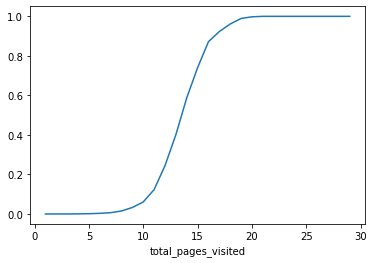

In [34]:
print("""  Nous constatons ici que plus nous consultons des pages sur ce site plus
nous avons une meilleure chance de convertir. La probabilité de conversion atteind les 60% aprèsavoir visité 15 pages """)

dataset.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

### Influence de l'age sur la conversion 

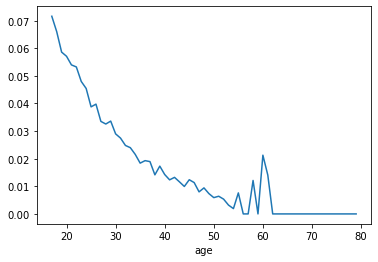

Les chances de conversion diminuent en prenant de l'âge sur ce site, les 20 ans représentent 7% de convertis 
de 63 à 80 ans  les chances sont très faibles <1% 
par contre entre 58 et 63 ans les convertis  passent à 2%



In [52]:
dataset.groupby(['age'])['converted'].mean().plot()
plt.show()

print("""Les chances de conversion diminuent en prenant de l'âge sur ce site, les 20 ans représentent 7% (tous les users)
de convertis 
de 63 à 80 ans  les chances sont très faibles <1% 
par contre entre 58 et 63 ans les convertis  passent à 2%
""")

### Uniquement les convertis 

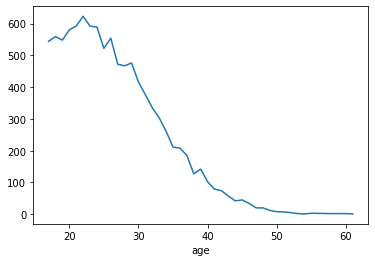

Cette figure nous montre que plus on prend de l'âge moins on convertis sur ce site, 
c'est donc un site de jeune A partir de 45 ans par là, nous avons moins de convertis. 
Pour confirmer cela nous allons déterminer les conversions par tranches d'ages



In [54]:
convertis = dataset.loc[dataset.converted ==1,  ["age", "converted"]].reset_index()
convertis = convertis.drop("index", axis = 1)
convertis.groupby(["age"])["converted"].sum().plot()
plt.show()

print("""Cette figure nous montre que plus on prend de l'âge moins on convertis sur ce site, 
c'est donc un site de jeune A partir de 45 ans par là, nous avons moins de convertis. 
Pour confirmer cela nous allons déterminer les conversions par tranches d'ages
""")

### Le nombre de conversions par tranche d'âge

In [43]:
dataset_20ans = dataset[(dataset.converted==1) & (dataset.age<=20)]
dataset_20_40ans = dataset[(dataset.converted==1) & (dataset.age>20) & (dataset.age<=40) ]
dataset_40_60ans = dataset[(dataset.converted==1) & (dataset.age>40) & (dataset.age<=60) ]
dataset_60ans_plus = dataset[(dataset.converted==1) & (dataset.age>60) ]

print("les convertis -de 20 ans : ", len(dataset_20ans), "\nles convertis entre 21_40 ans : ", len(dataset_20_40ans),
     "\nles convertis entre 41_60 ans ; ", len(dataset_40_60ans), "\nles convertis + de 61 ans : ", len(dataset_60ans_plus))

les convertis -de 20 ans :  2231 
les convertis entre 21_40 ans :  7553 
les convertis entre 41_60 ans ;  413 
les convertis + de 61 ans :  1


In [72]:
soe_convertis = (len(dataset_20_40ans) + len(dataset_40_60ans)+len(dataset_60ans_plus) + len(dataset_20ans))
print("Somme des convertis :" , soe_convertis)
# len(dataset[sataset.coverted ==1])

Somme des convertis : 10198


## Conclusin_3

# Machine learning et Modélisation 

Nous le ferons à l'aide d'un Pipeline 

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

### Nos encodeurs et Transformeurs

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Séparons notre dataset e train et test 

In [75]:
#dataset = pd.get_dummies(dataset, drop_first =True)
y = dataset.loc[:, ["converted"]]
X = dataset.loc[:, dataset.columns != "converted"] 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size= 0.3, stratify= y, random_state = 42)

### Nos estimateurs 

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


## Notre Pipeline

In [78]:
numerical_feature = make_column_selector(dtype_include = np.number)
categorical_feature = make_column_selector(dtype_exclude = np.number)


numerical_pipeline = make_pipeline(SimpleImputer(),
                                  StandardScaler())

categorical_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"), 
                                    OneHotEncoder())

preprocessor1 = make_column_transformer((numerical_pipeline, numerical_feature), 
                                        (categorical_pipeline, categorical_feature)) 

In [79]:
model1 =  make_pipeline(preprocessor1, 
                     SGDClassifier())
model1.fit(X_train, y_train)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F3238AC488>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

### Prédiction 

In [80]:
y_pred= model1.predict(X_test)

### Faisons des tests en prenant des profils au hasard

In [83]:
profils = pd.DataFrame({'country': ["US", "China", "Germany"], 
                        'age': [20, 60, 35], 
                        'new_user': [1, 1,1], 
                        'source': ["Ads", "Direct", "Seo"],
                        'total_pages_visited': [20,20, 10]
                       })
print(profils)
y_pred_1 =  model1.predict(profils)
y_pred_1

   country  age  new_user  source  total_pages_visited
0       US   20         1     Ads                   20
1    China   60         1  Direct                   20
2  Germany   35         1     Seo                   10


array([1, 0, 0], dtype=int64)

#### Un américain de 20 ans ayant visité 20 pages ==> il convertit

In [84]:
print(""" Nous remarquons ici que seul l'américain de 20 ans ayant visité 20 pages convertira
Diminuons un peu son nombre de pages visités et voyons ce que ça donne 
par la suite nous remettrons le nombre de pages visités et augmenterons son âge """)

 Nous remarquons ici que seul l'américain de 20 ans ayant visité 20 pages convertira
Diminuons un peu son nombre de pages visités et voyons ce que ça donne 
par la suite nous remettrons le nombre de pages visités et augmenterons son âge 


#### L'américain  de 20 ans visite 10 pages ==> il ne convertit plus 

In [192]:
profils = pd.DataFrame({'country': ["US", "China", "Germany"], 
                        'age': [20, 60, 35], 
                        'new_user': [1, 1,1], 
                        'source': ["Ads", "Direct", "Seo"],
                        'total_pages_visited': [10, 20, 10]
                       })
print(profils)
y_pred_1 =  model1.predict(profils)
y_pred_1

   country  age  new_user  source  total_pages_visited
0       US   20         1     Ads                   10
1    China   60         1  Direct                   20
2  Germany   35         1     Seo                   10


array([0, 0, 0], dtype=int64)

####  Un américain de 60 ans visite 20  pages ==> il convertit 

In [85]:
profils = pd.DataFrame({'country': ["US", "China", "Germany"], 
                        'age': [60, 60, 35], 
                        'new_user': [1, 1,1], 
                        'source': ["Ads", "Direct", "Seo"],
                        'total_pages_visited': [20, 20, 10]
                       })
print(profils)
y_pred_1 =  model1.predict(profils)
y_pred_1

   country  age  new_user  source  total_pages_visited
0       US   60         1     Ads                   20
1    China   60         1  Direct                   20
2  Germany   35         1     Seo                   10


array([1, 0, 0], dtype=int64)

### Un américain de 75 ans qui visite 18 pages ==> Ne convertit pas 

In [86]:
profils = pd.DataFrame({'country': ["US", "China", "Germany"], 
                        'age': [75, 60, 35], 
                        'new_user': [1, 1,1], 
                        'source': ["Ads", "Direct", "Seo"],
                        'total_pages_visited': [18, 20, 10]
                       })
print(profils)
y_pred_1 =  model1.predict(profils)
y_pred_1

   country  age  new_user  source  total_pages_visited
0       US   75         1     Ads                   18
1    China   60         1  Direct                   20
2  Germany   35         1     Seo                   10


array([0, 0, 0], dtype=int64)

## Conclusion_4 
    Tout porte donc à croire que ça se joue sur l'âge et sur le nombre de pages visitées. 
    Comme nous l'avions signalé plus haut l'âge et le nombre de pages visités sont prédominants

    Après avoir étudié le score de notre modèle nous verons justement l'importance des ces features et tenterons de trouver à quel User  optimal l'équpe MRK devrait se concentrer. ==> en Utilisant le learning_curve

### Score du Modèle 

In [96]:
print( "Score test : {}".format(model1.score(X_test, y_test)),
      "\n Score train : {}".format(model1.score(X_train, y_train)),
      "\n Score_reel : {}".format(model1.score(X, y)) )

Score test : 0.9859687961205987 
 Score train : 0.9860439689524618 
 Score_reel : 0.986021416960259


In [88]:
model2 =  make_pipeline(preprocessor1, 
                     RandomForestClassifier())
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

C:\ANACONDA\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9842188488298546

## Conclusion_5

In [90]:
print("Nbre de convertis : ", len(dataset[dataset.converted == 1]), "; contre ", 
      "Nbre de non convertis : ", len(dataset[dataset.converted == 0]))

data.converted.value_counts(normalize = True)
#len(data[data.converted == 1]) / data.shape[0]

Nbre de convertis :  10198 ; contre  Nbre de non convertis :  306000


0    0.967742
1    0.032258
Name: converted, dtype: float64

## Etudions la qualité de notre modèle dans ses conditions 

### Confusion Matrix avec le random forest

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred= model2.predict(X_test) ) 

   Non_converted  Converted
0          91284        517
1            980       2079


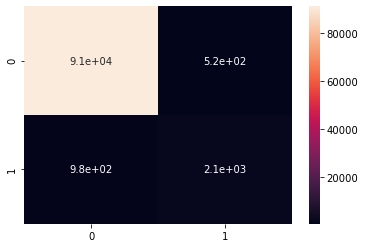

In [99]:
# Afficher la cm 
print(pd.DataFrame(cm,columns = ["Non_converted", "Converted"]))

ax = sns.heatmap(cm, annot=True) 
plt.show()

###  Confusion Matrix avec le SGDClassifier

   Non_converted  Converted
0          91312        489
1            842       2217


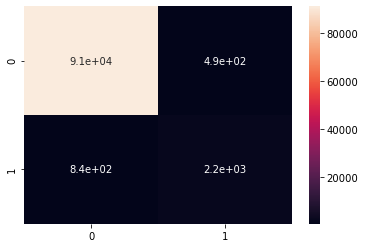

In [100]:
cm = confusion_matrix(y_test, y_pred= model1.predict(X_test) ) 


print(pd.DataFrame(cm,columns = ["Non_converted", "Converted"]))
ax = sns.heatmap(cm, annot=True) 
plt.show()


## Conclusion_6

## A suivre les variables les plus importantes pour la conversion 

La cross validation + Gridsarch pour performer le modèle.

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_score(model1, X_train,y_train, cv=5, scoring = "accuracy").mean()

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ANACONDA\lib\site-packages\sklearn\utils\

0.9858225916687745